
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Thursday, November 29th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please format **your filename to include your EID** (ex. ss324.ipynb or ss324_mj345.ipypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

#### Hope Knopf - hk23735

#### Chelsea Matthews - Cm58685

# Question 1 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

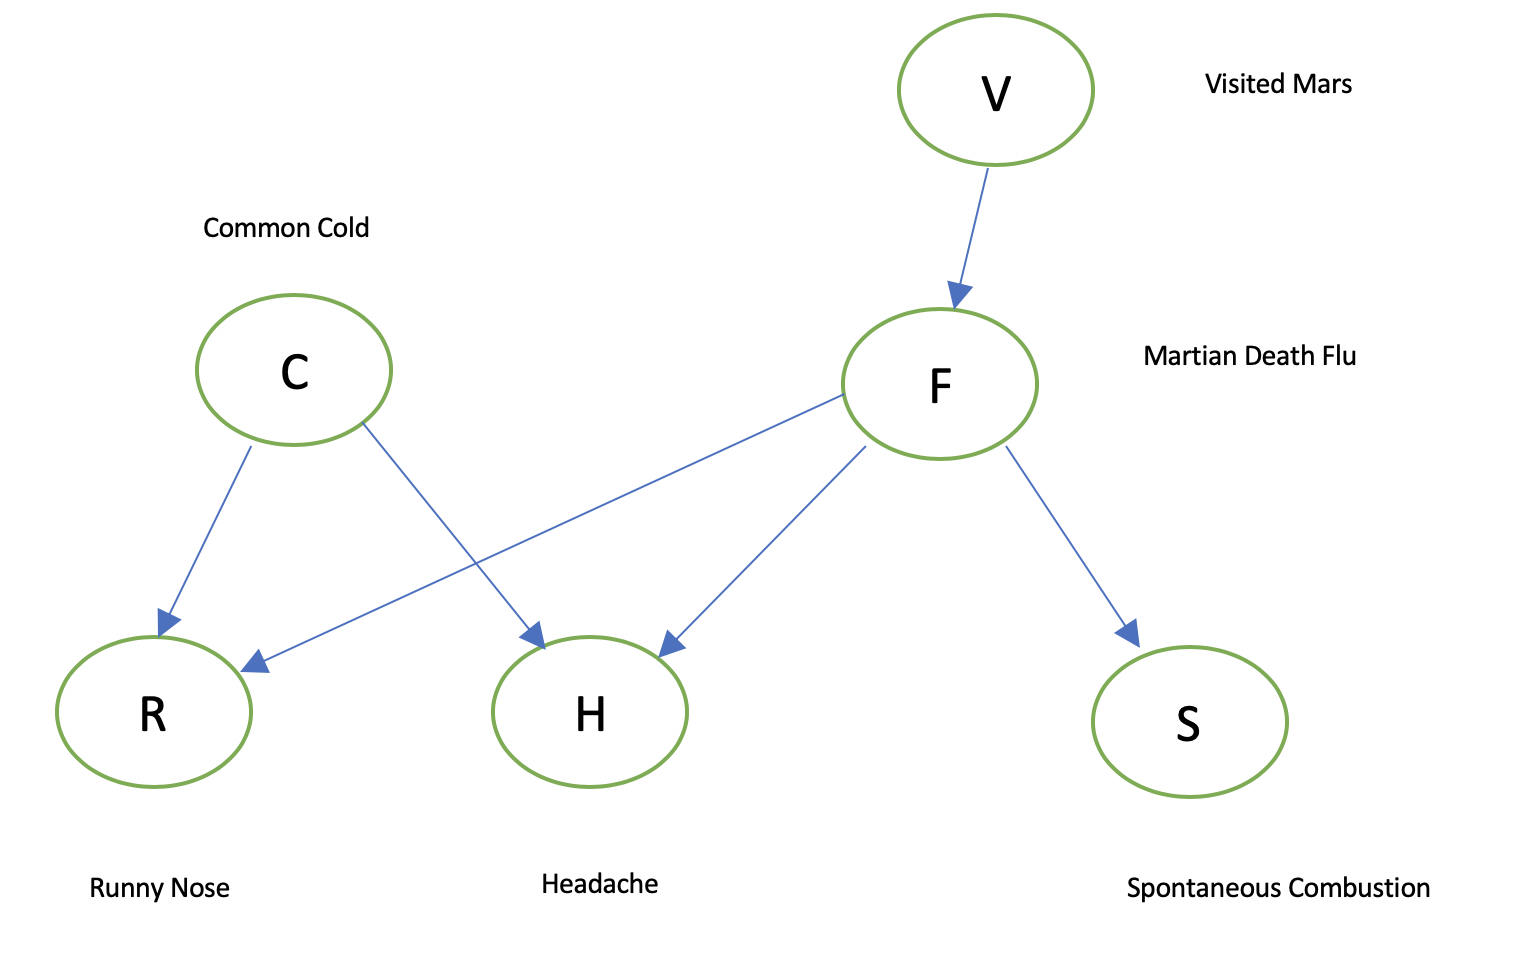

In [1]:
from IPython.display import Image
Image(filename='BBN.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities : 


(a) (5 pts) Find the probability that a person has a headache.

(b) (5 pts) Given that a person visited Mars, what is the probability that he has a runny nose?

(c) (5 pts) Given that a person visited Mars and has a runny nose, what is the probability that the person has a common cold and not the Martian Death Flu?

## Answer

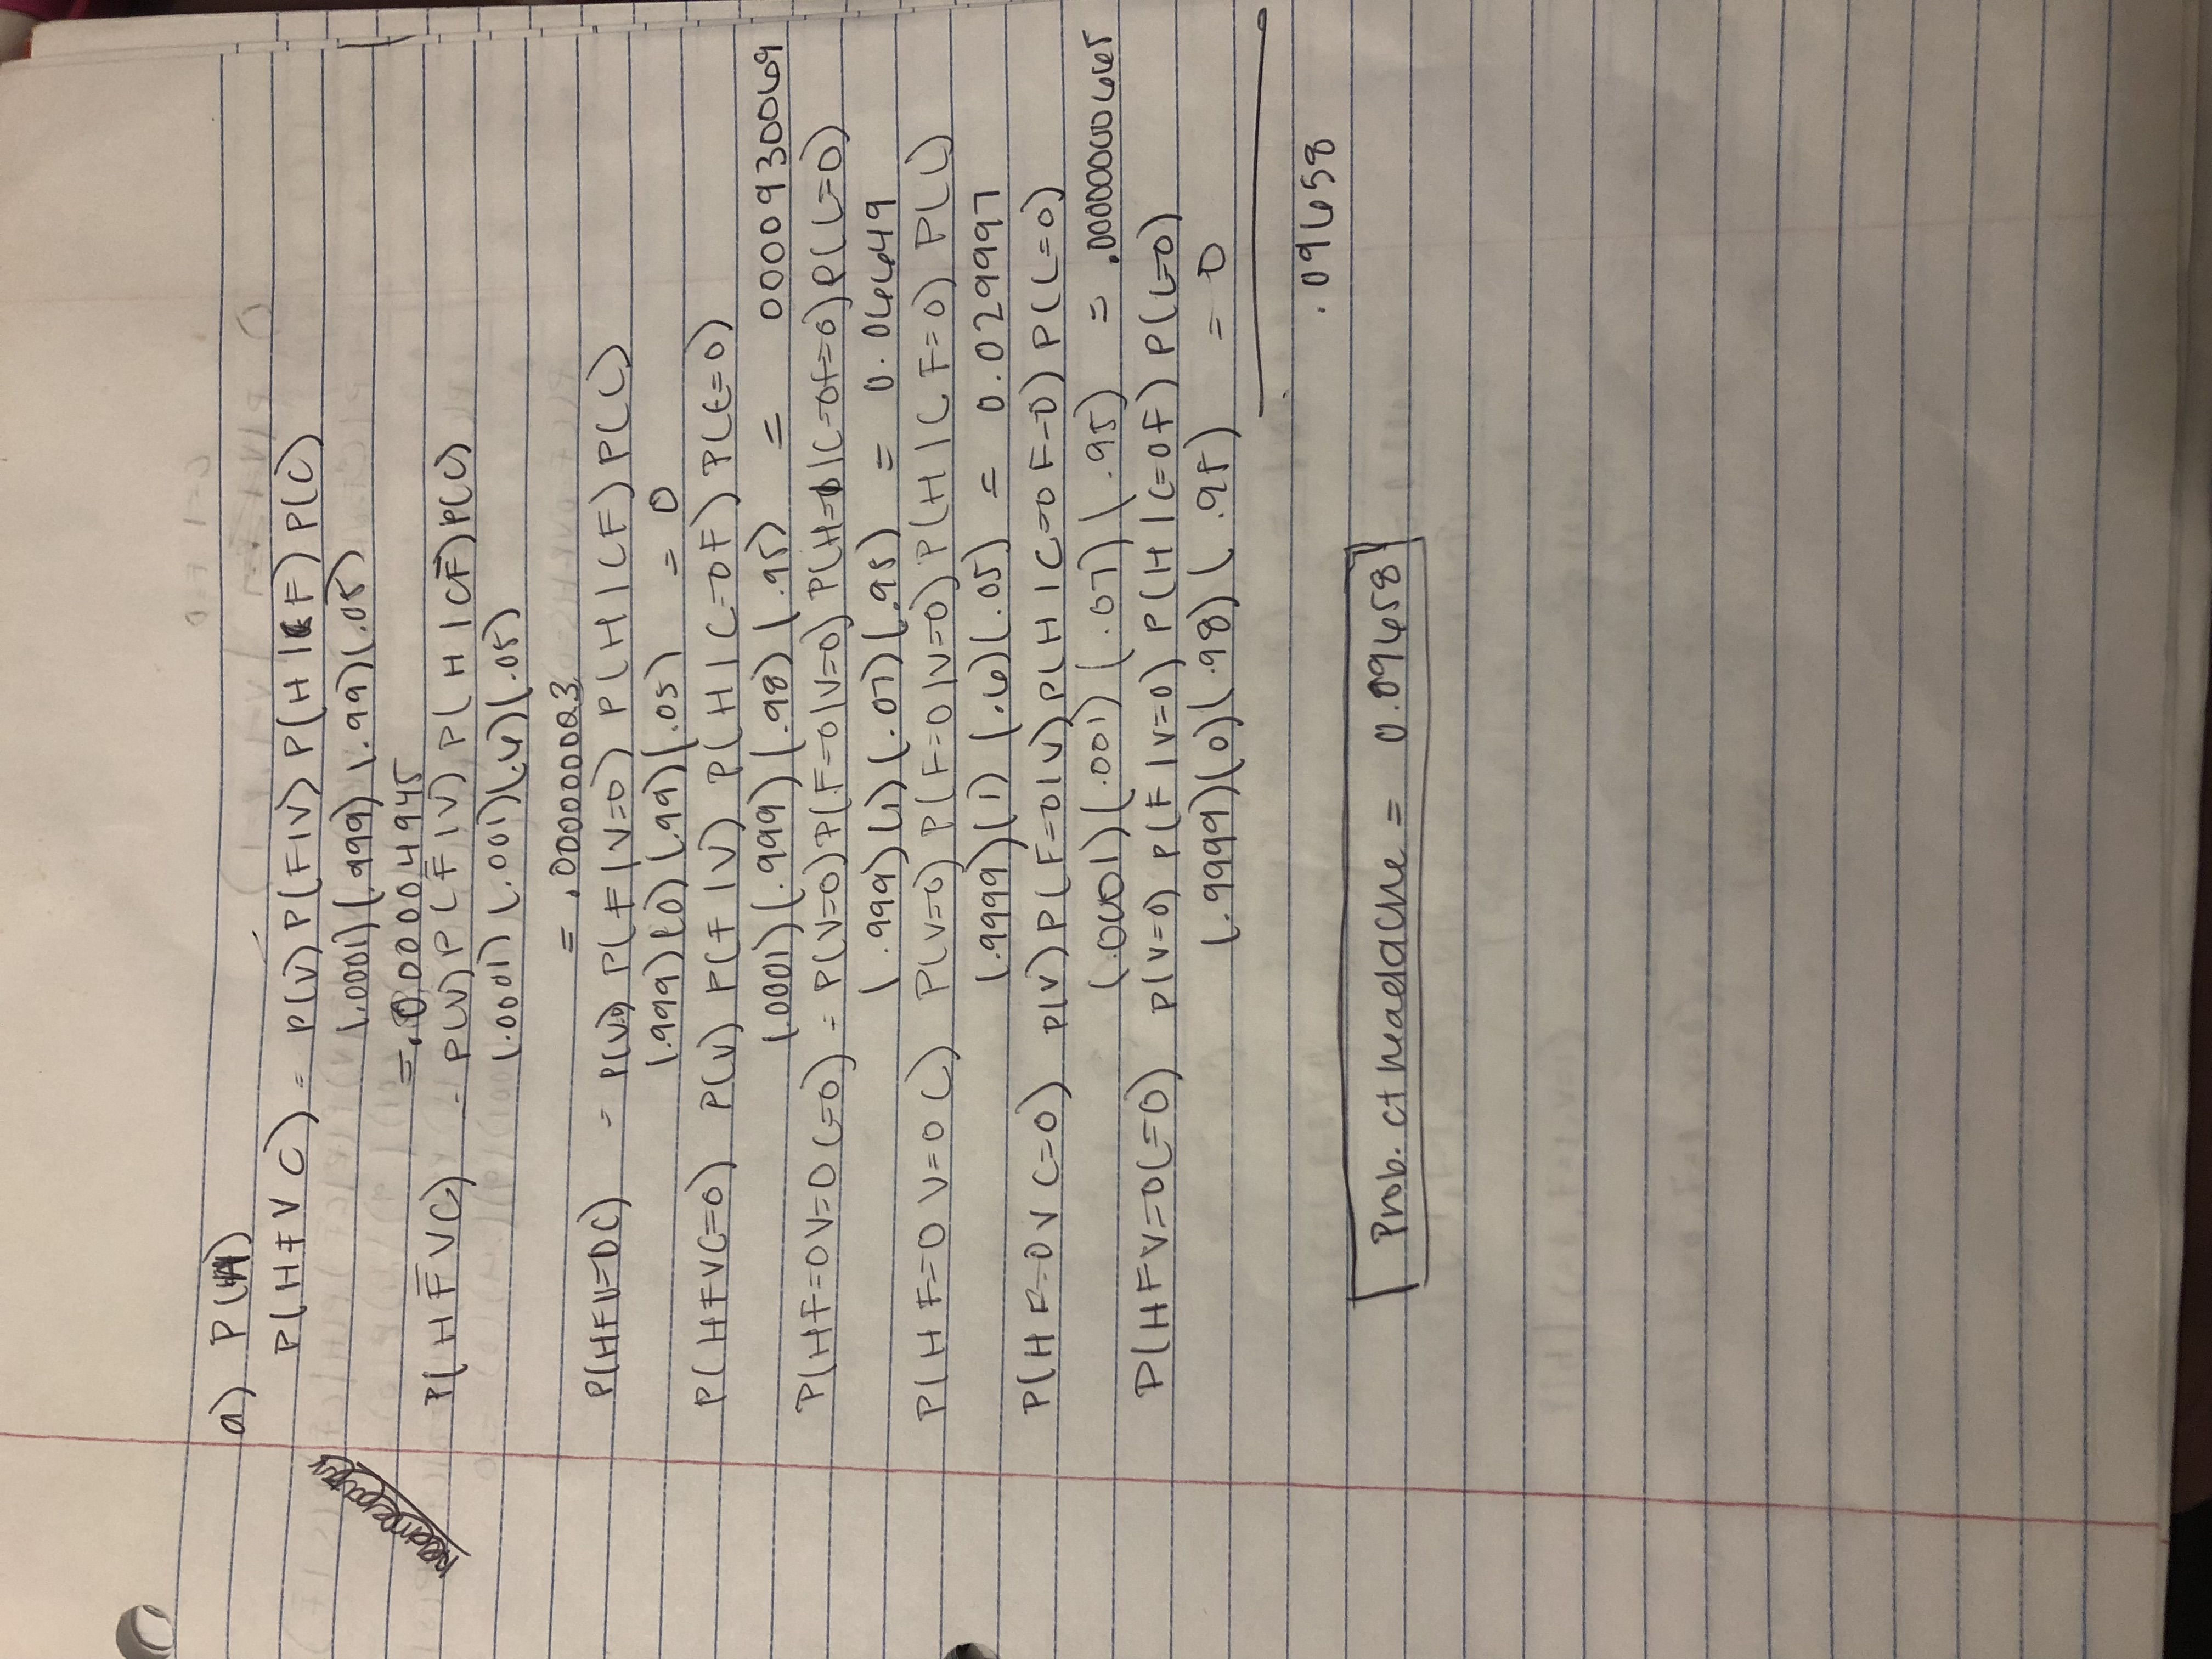

Answer for a):  The probability that a person has a  headache is 0.09658

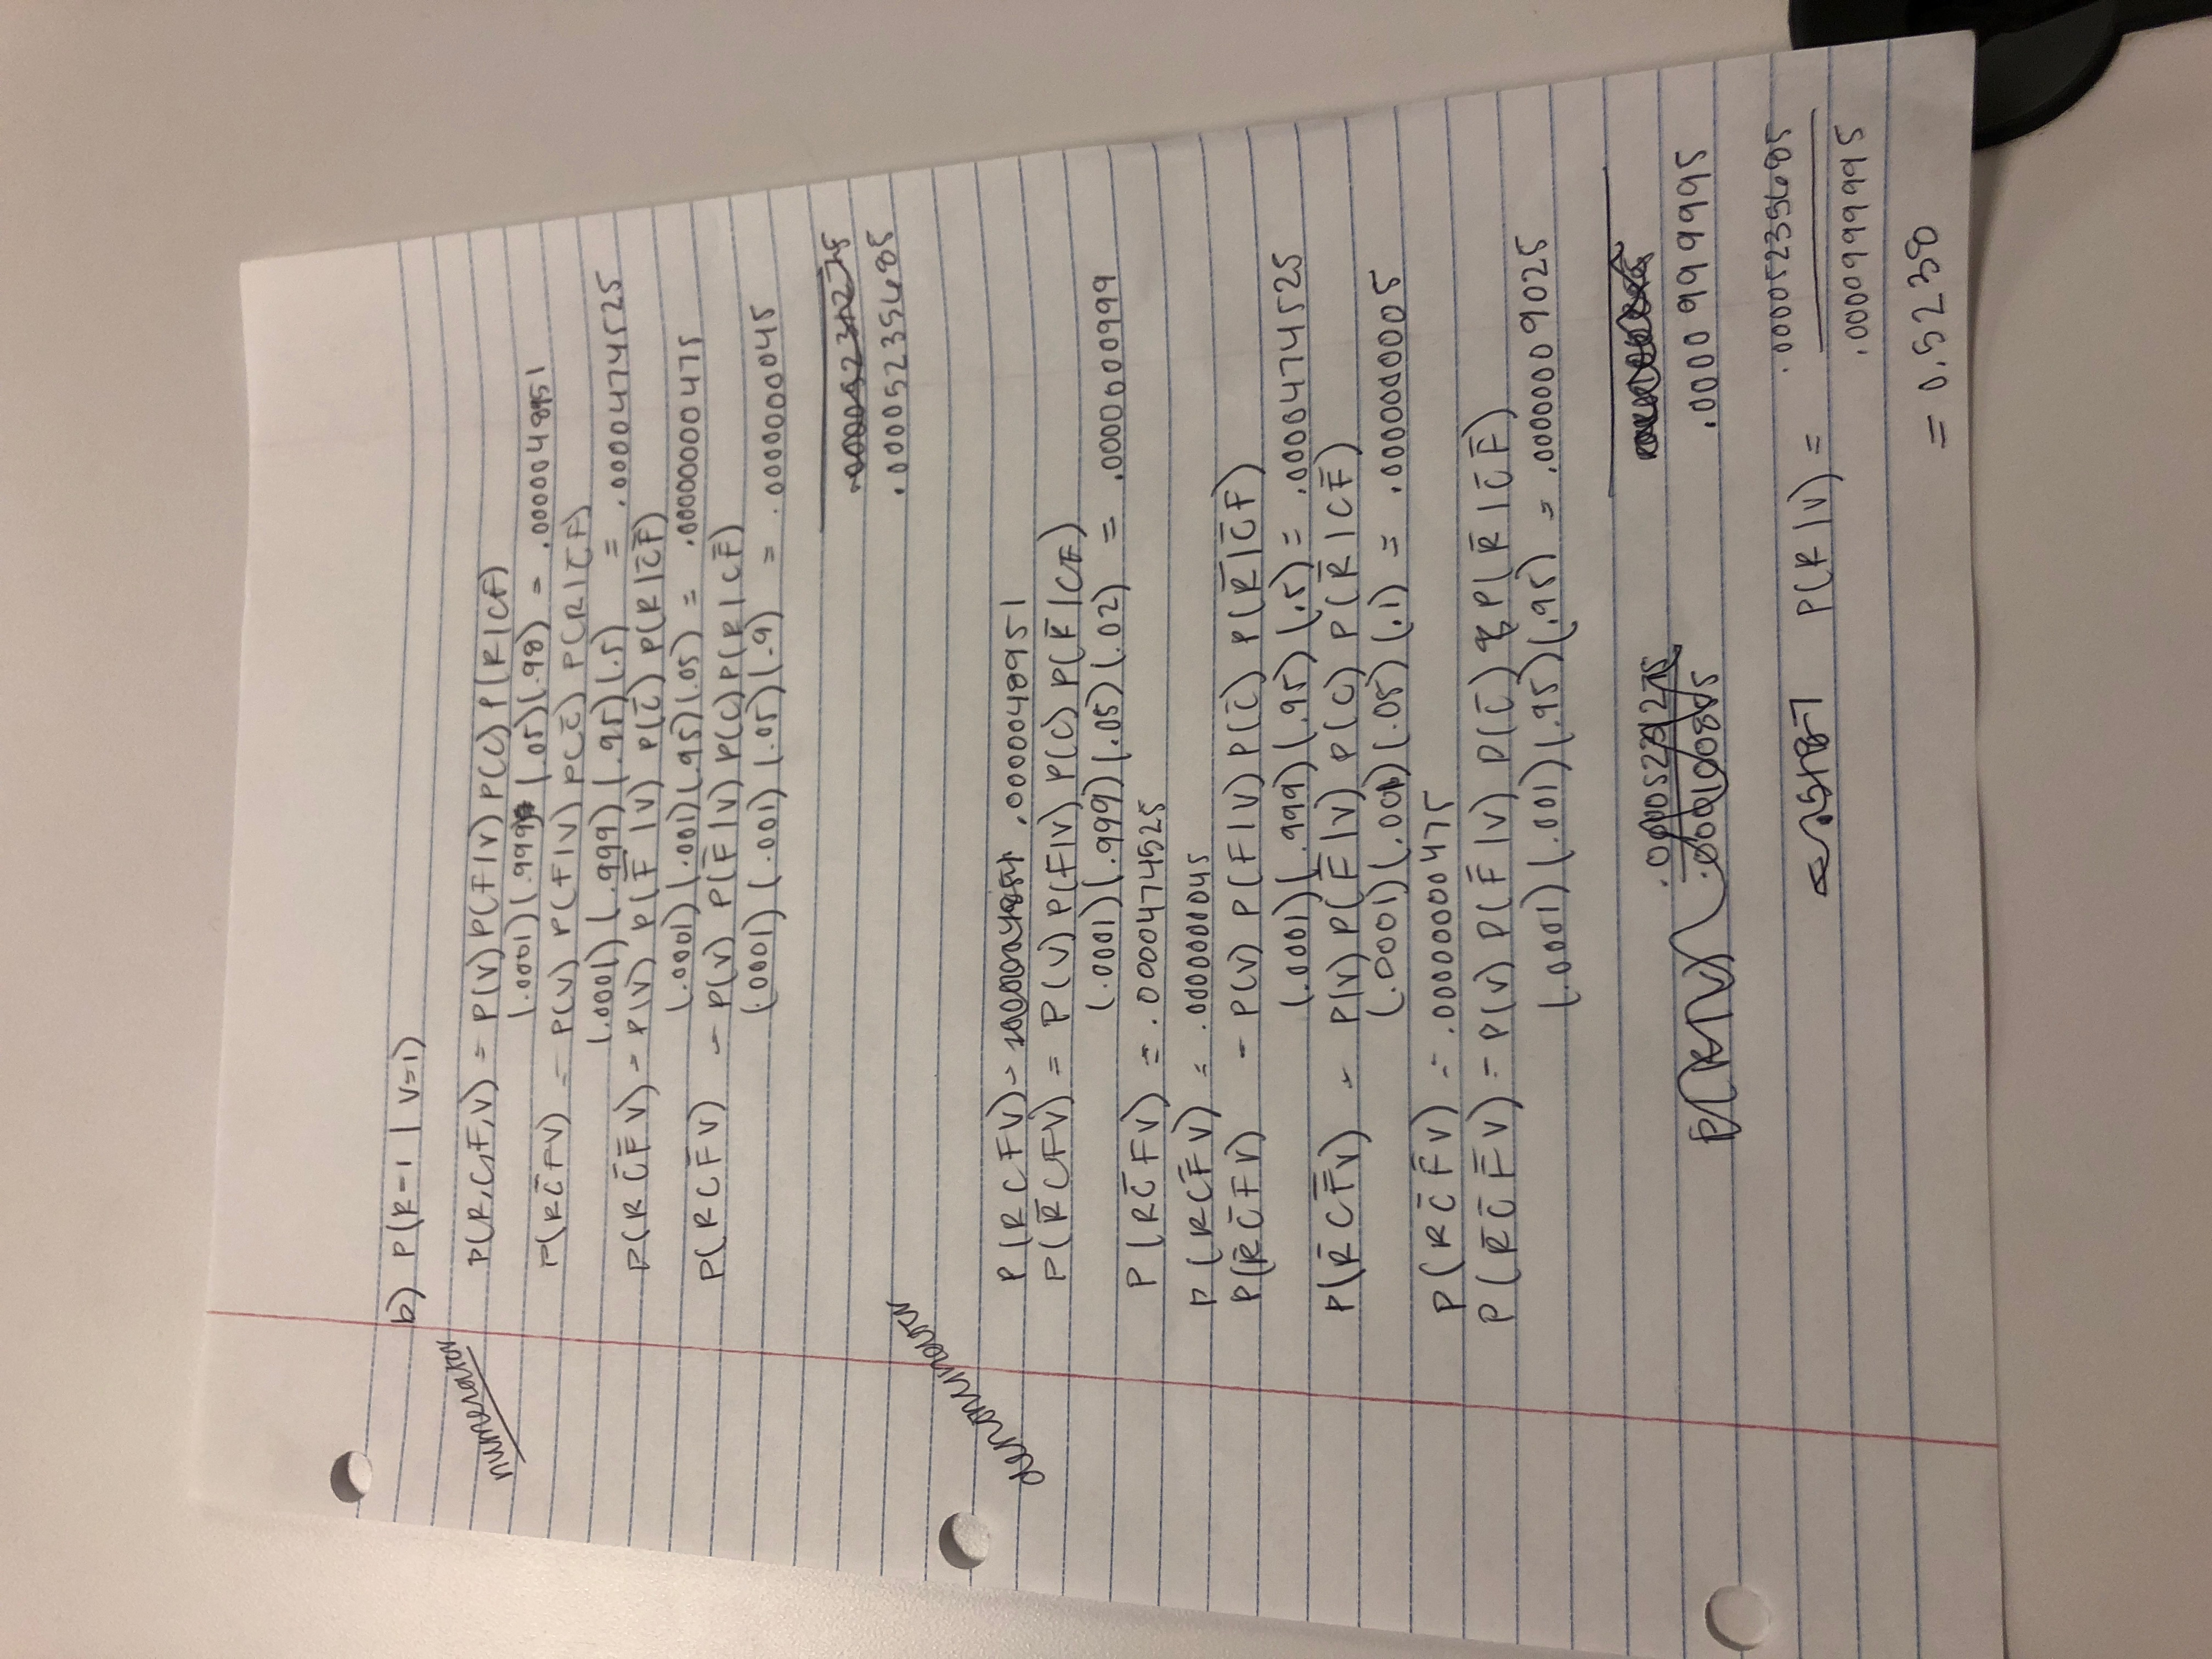

Answer for b): Given that a person visited mars, the probability that he has a runny nose is 0.5238

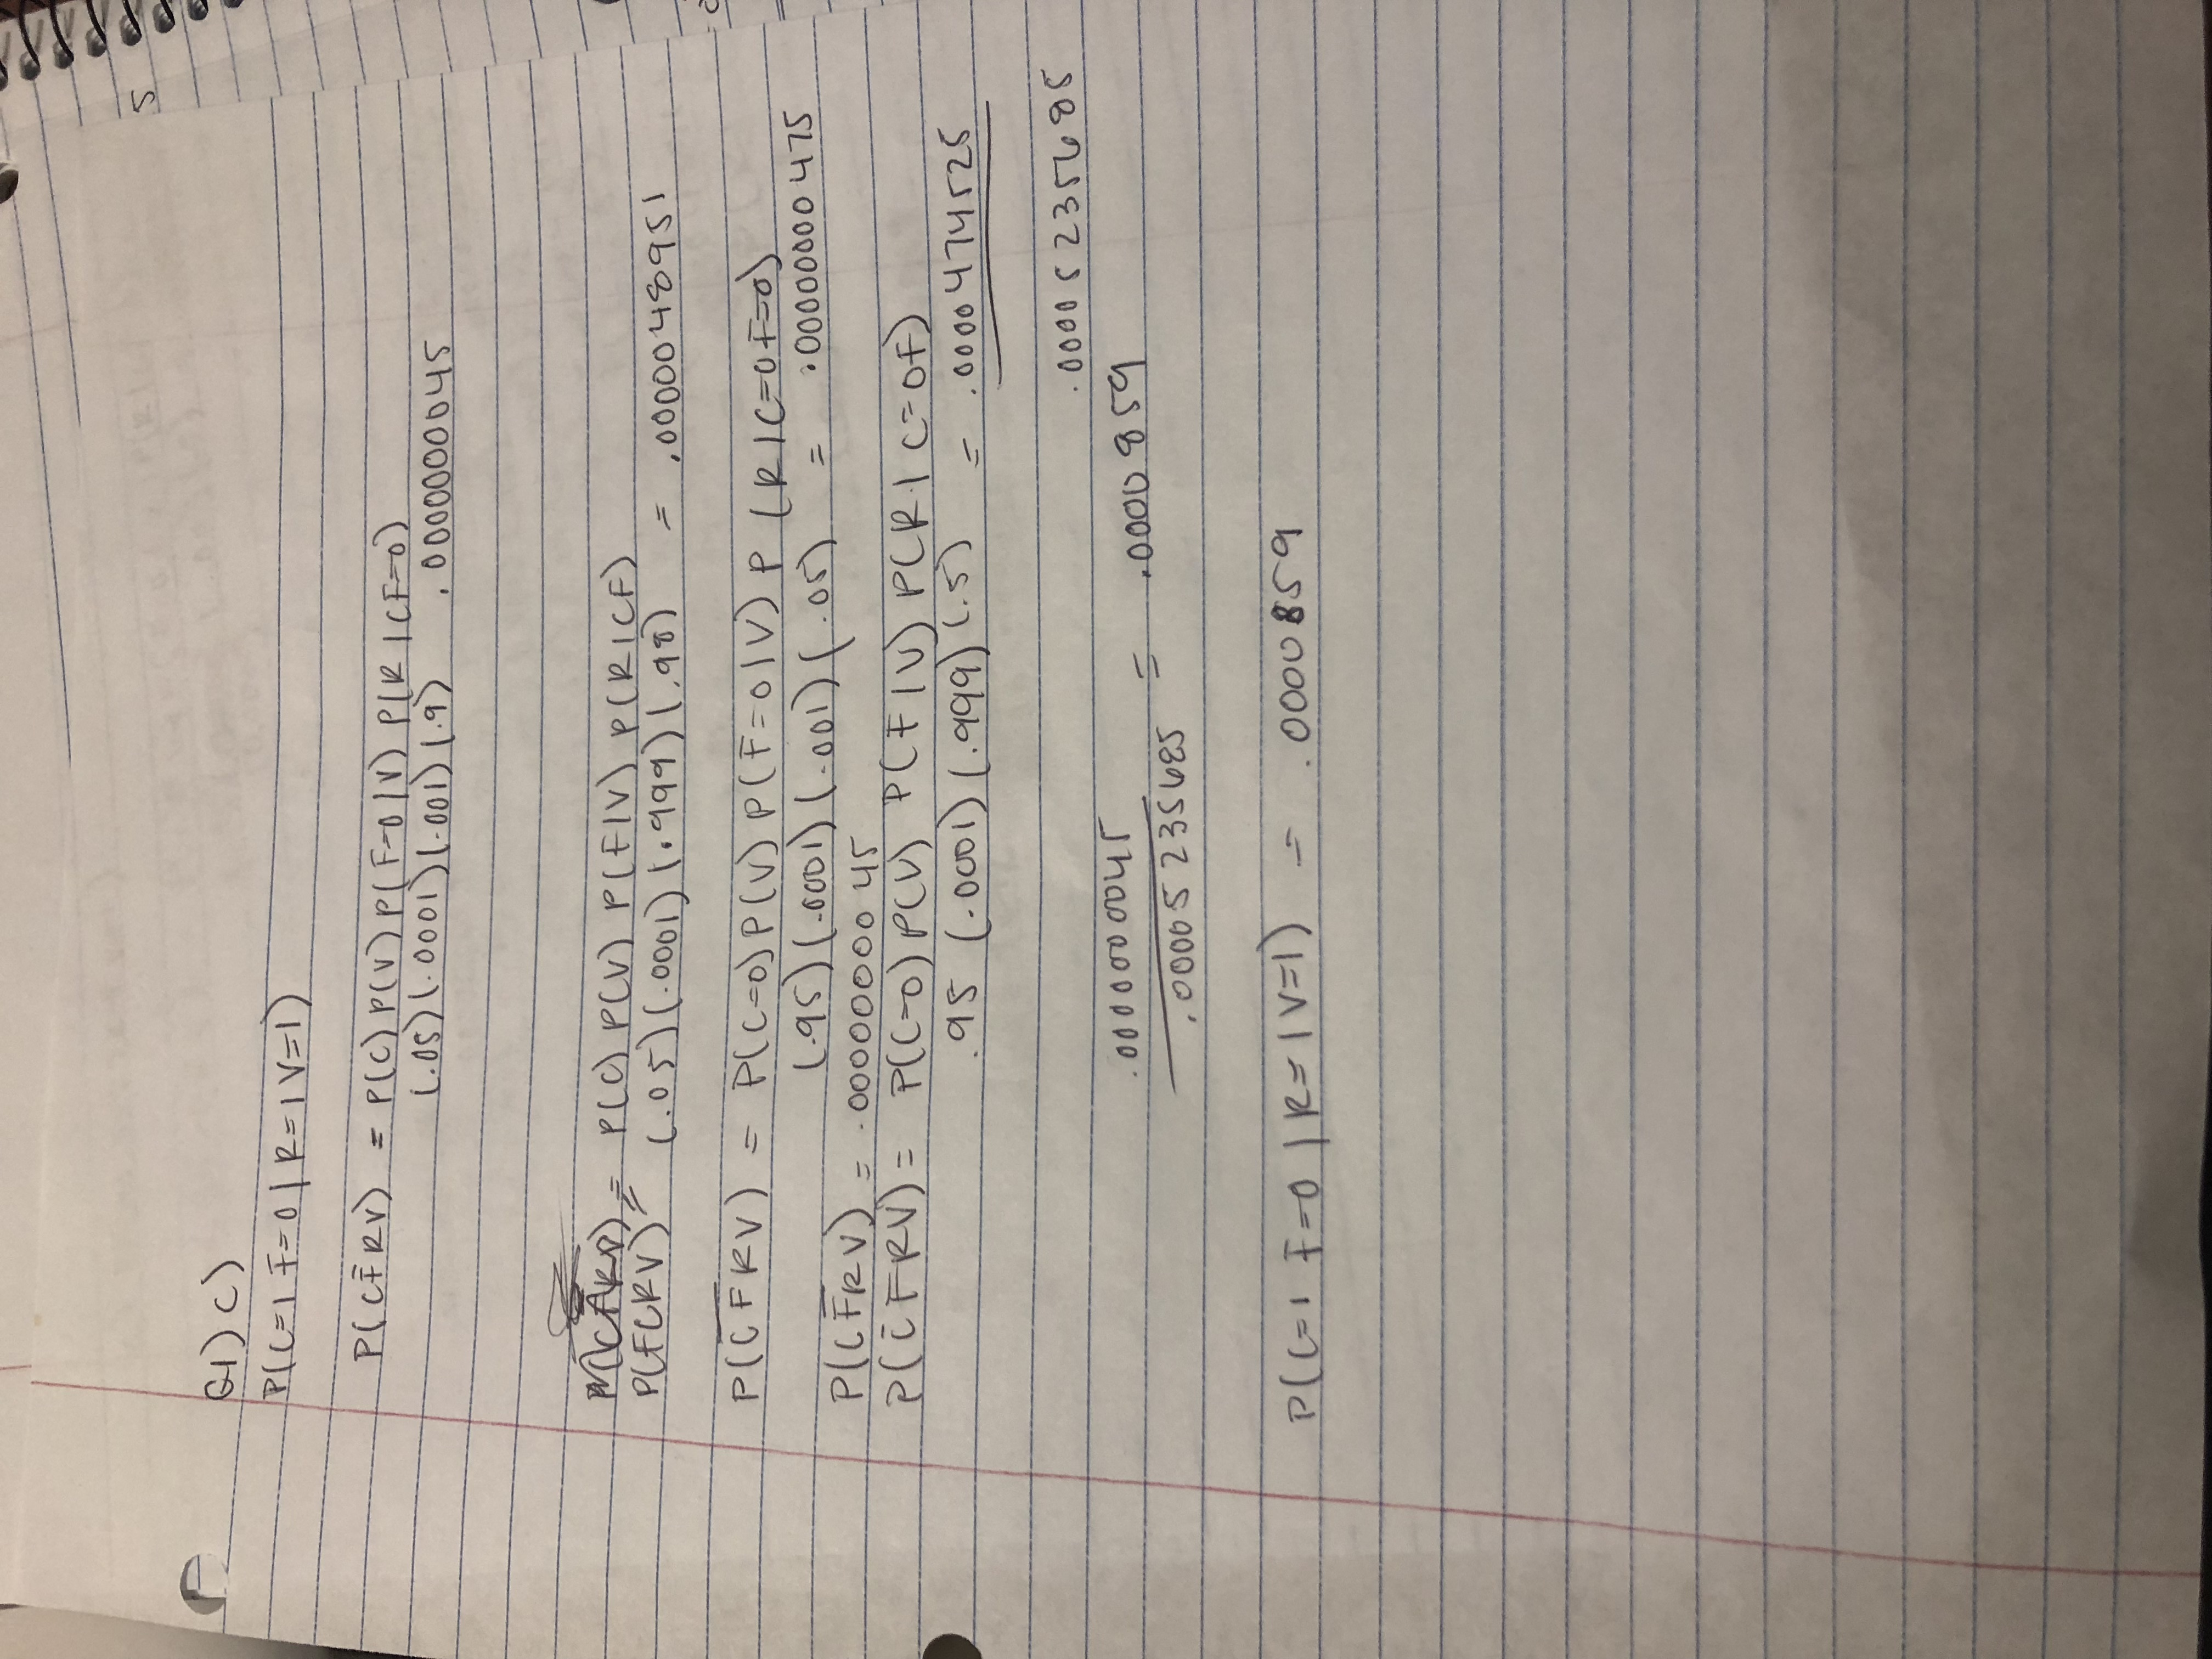

Answer for c): Given that a person visited Mars and has a runny nose, the probability that the person has a common cold and not the Martian Death Flu is 0.0000859

# Question 2 - Support Vector Machine ( 15 points)

## Gender Recognition by voice

In this question, we will try to identify a voice as male or female. The dataset is taken from kaggle [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender/home). Go ahead and read it to understand the different variables.

(a) (6pts) Apply a linear SVM, using scikit-SVM. Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) (6pts) Repeat (a) but with a Gaussian radial basis kernel.

(c) (3pts) Summarize the comparative performance (mean error rates) of the classifiers. What can you conclude? (Be brief.)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('voice.csv')

In [3]:
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [4]:
data.shape

(3168, 21)

In [5]:
X=data.iloc[:, :-1]
X.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274

In [6]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (2122, 20) (2122,)
test (1046, 20) (1046,)


#### Part a

In [ ]:
#Apply a linear SVM, using scikit-SVM. Specify how you chose the slack cost/penalty

In [7]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

/Users/hopeknopf/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hopeknopf/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
def per_class_accuracy(ground_truth, prediction):
    cm = confusion_matrix(ground_truth, prediction)
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / len(ground_truth)


my_scorer = make_scorer(per_class_accuracy, greater_is_better=True)

In [21]:
LinearSVC = SVC(kernel='linear')
tuned_parameters = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
LinearSVCGS = GridSearchCV(
    LinearSVC,
    tuned_parameters,
    scoring=my_scorer,
    cv=10,
)

LinearSVCGS.fit(X_train, y_train)
print ('Best C is ', LinearSVCGS.best_params_)
print ('Best score is', LinearSVCGS.best_score_)

Best C is  {'C': 10}
Best score is 0.9731385485391141


In [22]:
LinearSVC = SVC(C=1000, kernel='linear')
LinearSVC.fit(X_train, y_train)
y_pred_linear = LinearSVC.predict(X_test)
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_linear

array([[496,  11],
       [ 13, 526]])

In [23]:
LinearSVCGS.grid_scores_

/Users/hopeknopf/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97078, std: 0.00721, params: {'C': 0.01},
 mean: 0.97031, std: 0.00918, params: {'C': 0.1},
 mean: 0.97172, std: 0.01072, params: {'C': 1},
 mean: 0.97314, std: 0.01009, params: {'C': 10},
 mean: 0.97267, std: 0.01047, params: {'C': 100},
 mean: 0.97314, std: 0.01009, params: {'C': 1000}]

In [24]:
def get_accuracy(cm):
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / (cm[0][0] + cm[1][0] + cm[1][1] + cm[0][1])

In [26]:
print (get_accuracy(conf_mat_linear))

0.9770554493307839


#### Part b 

In [ ]:
#Repeat (a) but with a Gaussian radial basis kernel.

In [28]:
GaussianSVC = SVC(kernel='rbf')
GaussianSVCGS = GridSearchCV(
    GaussianSVC,
    tuned_parameters,
    scoring=my_scorer,
    cv=10,
)

GaussianSVCGS.fit(X_train, y_train)
print ('Best C is ', GaussianSVCGS.best_params_)
print ('Best score is', GaussianSVCGS.best_score_)

Best C is  {'C': 1}
Best score is 0.9811498586239397


In [29]:
GaussianSVC = SVC(C=10, kernel='rbf')
GaussianSVC.fit(X_train, y_train)
y_pred_gaussian = GaussianSVC.predict(X_test)
conf_mat_gaussian = confusion_matrix(y_test, y_pred_gaussian)
conf_mat_gaussian

array([[498,   9],
       [ 10, 529]])

In [31]:
print (get_accuracy(conf_mat_gaussian))

0.9818355640535373


In [32]:
GaussianSVCGS.grid_scores_

/Users/hopeknopf/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.88784, std: 0.01695, params: {'C': 0.01},
 mean: 0.96701, std: 0.01314, params: {'C': 0.1},
 mean: 0.98115, std: 0.00787, params: {'C': 1},
 mean: 0.97691, std: 0.00716, params: {'C': 10},
 mean: 0.97502, std: 0.00890, params: {'C': 100},
 mean: 0.97549, std: 0.00832, params: {'C': 1000}]

#### Part c

#### Accuracy is slightly higher for Gaussian (98.2% vs 97.7%) though they both perform pretty well.  I can conclude that both types of kernels for the SVM model were very accurate for this data, and choosing an optimal slack parameter was crucial for performance.

# Question 3 - Ensembles ( 20 points)

In this question, we will compare the performance of different ensemble methods for classification problems: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). 

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available on canvas as ensemble-dataset.csv. 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.


1. (5pts) Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict whether somebody will experience financial distress in the next two years. Find the best parameters (including *n_estimators* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data. You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. Plot the feature importance as well.

2. (10pts) Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate,* and *max_depth (GBDT only)*), and report the confusion matrix and roc_auc_score on test data for each classifier. Also plot the feature importance for each classifier.

3. (5pts) Point out one advantage and one disadvantage of Random Forest compared to GBDT.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('ensemble-dataset.csv')

In [4]:
data.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 0                              1.062646   50   
1                 0                              0.003591   83   
2                 0                              1.000000   22   
3                 0                              0.000000   52   
4                 0                              0.220152   54   

   NumberOfTime30.59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.179032           3490   
1                                     0   0.000869          10352   
2                                     0   0.000000            100   
3                                     0   0.336355           7060   
4                                     0   0.235064           4083   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                8                        1   
1                               14                        0   
2                                1                        0   
3                               10                        0   
4                               15                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60.89DaysPastDueNotWorse  \
0                             0                                     1   
1                             0                                     0   
2                             0                                     0   
3                             2                                     0   
4                             0                                     0   

   NumberOfDependents  
0                   1  
1                   0  
2                   0  
3                   3  
4                   1

In [36]:
data.shape

(5049, 11)

In [5]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3382, 10) (3382,)
test (1667, 10) (1667,)


## Answer

#### #1

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
#random forrest to predict whether somebody will experience financial distress in the next two years

In [30]:
# Random Forest using GridSearch method
parameters = {
    'criterion': ('gini', 'entropy'),
    'max_depth': np.array([4,6,8]),
    'max_features': np.array([1,5,9])
}
RF = RandomForestClassifier(random_state=42,  n_estimators=100)
RFGS = GridSearchCV(estimator=RF, param_grid=parameters, cv=3, n_jobs=4)

RFGS.fit(X_train, y_train)
print (RFGS.best_params_)
print (RFGS.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 5}
0.9281490242460083


In [31]:
RF = RandomForestClassifier(
    criterion='gini', max_depth=4, random_state=42, max_features=5)
fit = RF.fit(X_train, y_train)
y_predicted_train = RF.predict(X_train)
y_predicted_test = RF.predict(X_test)
print ('Training set MSE is', mean_squared_error(y_train, y_predicted_train))
print ('Testing set MSE is', mean_squared_error(y_test, y_predicted_test))
print ('Accuracy rate is ', accuracy_score(y_test, y_predicted_test))


Training set MSE is 0.0638675340035482
Testing set MSE is 0.06418716256748651
Accuracy rate is  0.9358128374325135


In [32]:
#confusion matrix 
confusion_matrix(y_test, y_predicted_test)

array([[1550,    9],
       [  98,   10]])

In [33]:
#ROC auc score 
roc_auc_score(y_test, y_predicted_test)

0.5434098306131661

Text(0.5,0,'Relative Importance')

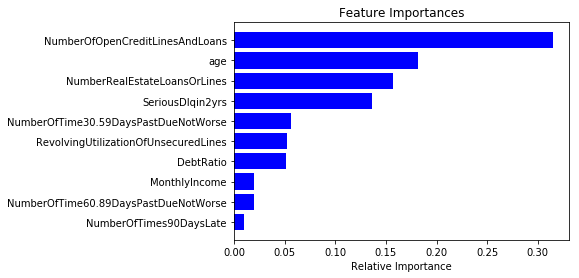

In [34]:
#plot feature importance 
features = data.columns
importances = fit.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

#### #2

In [39]:
#gradient boost decision tree and adaboost
parameter_candidates = {
    'loss': ('deviance', 'exponential'),
    'learning_rate': np.array([0.1,0.001,0.0001]),
    'max_depth': np.array([7,9,11]),
    'max_features': np.array([5,7,9]),
    'n_estimators': np.array([4,6,8])
}
GBDT = GradientBoostingClassifier(random_state=42)
GBDTGS = GridSearchCV(
    estimator=GBDT, param_grid=parameter_candidates, cv=3, n_jobs=4)

fit_GB = GBDTGS.fit(X_train, y_train)
print (GBDTGS.best_params_)
print (GBDTGS.best_score_)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 9, 'max_features': 7, 'n_estimators': 4}
0.9269662921348315


In [40]:
GBDT = GradientBoostingClassifier(
    max_depth=9,
    max_features=7,
    learning_rate=0.1,
    loss='deviance',
    random_state=42,
    n_estimators = 4)
fit_GBDT=GBDT.fit(X_train, y_train)
y_GBDTpredicted_train = GBDT.predict(X_train)
y_GBDTpredicted_test = GBDT.predict(X_test)

print ('Training MSE is', mean_squared_error(y_train, y_GBDTpredicted_train))
print ('Testing MSE is', mean_squared_error(y_test, y_GBDTpredicted_test))
print ('accuracy rate is', accuracy_score(y_test, y_GBDTpredicted_test))


Training MSE is 0.07332939089296274
Testing MSE is 0.0653869226154769
accuracy rate is 0.9346130773845231


In [46]:
from sklearn.model_selection import GridSearchCV
#from GridSearchCV import best_params_

In [49]:
#adaboost classifier 
parameter_candidates = {
    'learning_rate': np.array([0.1,0.001,0.0001]),
    'n_estimators': np.array([4,6,8])    
}
ABC = AdaBoostClassifier(random_state=42)
ABCGS = GridSearchCV(estimator=ABC, param_grid=parameter_candidates, cv=3, n_jobs=4)

ABCGS.fit(X_train, y_train)
print (ABCGS.best_params_)
print (ABCGS.best_score_)

{'learning_rate': 0.1, 'n_estimators': 4}
0.9263749260792431


In [50]:
#adaboost classifier 
ABC = AdaBoostClassifier(n_estimators=4, learning_rate=0.1, random_state=42)

fit_ABC = ABC.fit(X_train, y_train)
y_ABCpredicted_train = ABC.predict(X_train)
y_ABCpredicted_test = ABC.predict(X_test)

print ('Training MSE is', mean_squared_error(y_train, y_ABCpredicted_train))
print ('Testing MSE is', mean_squared_error(y_test, y_ABCpredicted_test))
print ('accuracy rate is', accuracy_score(y_test, y_ABCpredicted_test))


Training MSE is 0.07362507392075694
Testing MSE is 0.0647870425914817
accuracy rate is 0.9352129574085183


In [51]:
#report the confusion matrix GBDT
confusion_matrix(y_test, y_GBDTpredicted_test)

array([[1558,    1],
       [ 108,    0]])

In [52]:
#confusion matrix AdaBoost
confusion_matrix(y_test, y_ABCpredicted_test)

array([[1559,    0],
       [ 108,    0]])

In [53]:
#ROC auc score GBDT
roc_auc_score(y_test, y_GBDTpredicted_test)

0.4996792815907633

In [54]:
#ROC auc score AdaBoost
roc_auc_score(y_test, y_ABCpredicted_test)

0.5

Text(0.5,0,'Relative Importance')

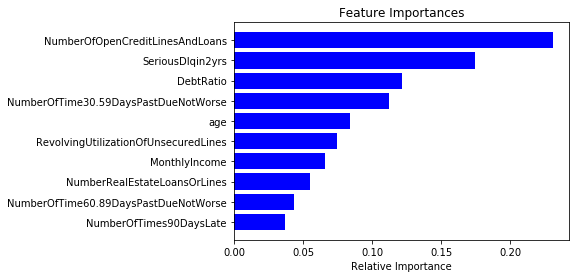

In [97]:
#plot feature importance for GBDT

features = data.columns
importancesGB = fit_GBDT.feature_importances_
indicesGB = np.argsort(importancesGB)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indicesGB)), importancesGB[indicesGB], color='b', align='center')
plt.yticks(range(len(indicesGB)), features[indicesGB])
plt.xlabel('Relative Importance')

Text(0.5,0,'Relative Importance')

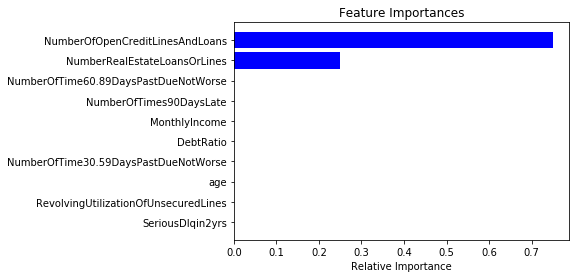

In [56]:
#plot feature importance for AdaBoost

features = data.columns
importancesABC = fit_ABC.feature_importances_
indicesABC = np.argsort(importancesABC)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indicesABC)), importancesABC[indicesABC], color='b', align='center')
plt.yticks(range(len(indicesABC)), features[indicesABC])
plt.xlabel('Relative Importance')

#### #3

Point out one advantage and one disadvantage of Random Forest compared to GBDT.

#### One advantage of Random Forest is that it uses random samples of data, which helps to make the model more robust and less likely to overfit the data.  Random Forest is also usually quicker than GBDT.  On the other hand, GBDT builds decision trees seqentially, which usually provides the advantage of being a better learner than Random Forest.